<a href="https://colab.research.google.com/github/HoangThangCDT/Homework/blob/main/Predict_fruit_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf


In [2]:

im_shape = (150,150)

TRAINING_DIR = '../content/drive/MyDrive/fruit/data/train_data'
TEST_DIR = '../content/drive/MyDrive/fruit/data/test_data'

seed = 10

BATCH_SIZE = 16

In [3]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# Generator data train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator data validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 348 images belonging to 10 classes.
Found 83 images belonging to 10 classes.
Found 118 images belonging to 10 classes.
Classes: ['bơ', 'cam', 'cherry', 'chuoi', 'kiwi', 'nho', 'strawberry', 'tao', 'thom', 'xoai']


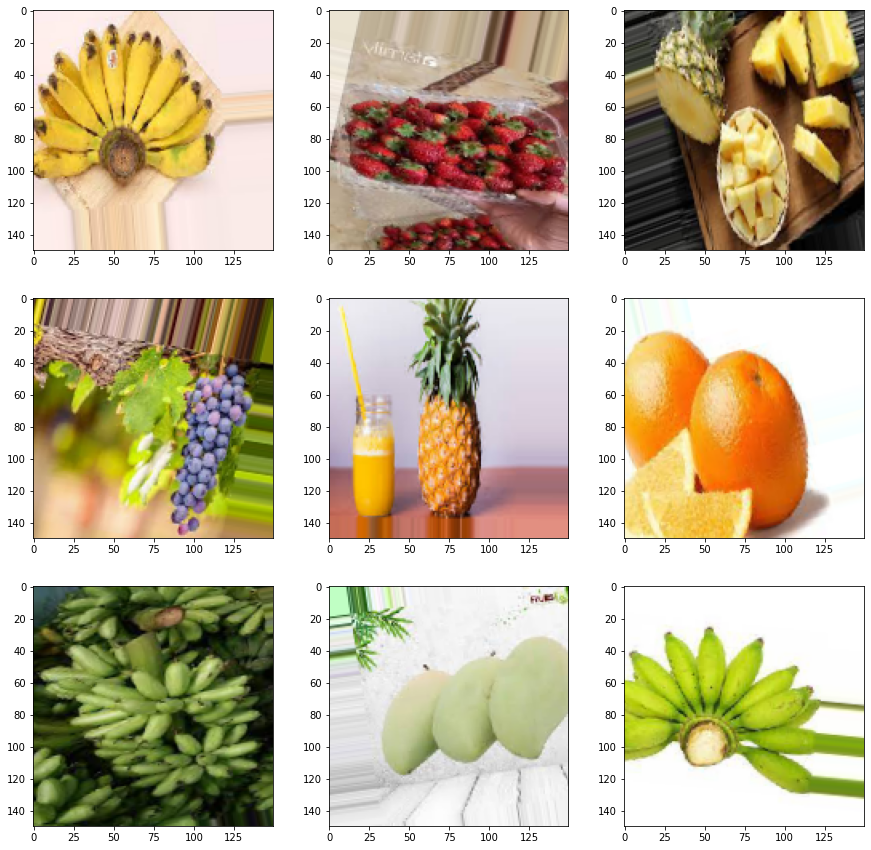

In [6]:
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 331776)            0         
                                                                 
 dense (Dense)               (None, 128)               42467456  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [8]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=100,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/100
21/21 [==============================] - 75s 3s/step - loss: 5.0918 - accuracy: 0.1988 - val_loss: 1.9201 - val_accuracy: 0.2250
Epoch 2/100
21/21 [==============================] - 3s 131ms/step - loss: 1.8662 - accuracy: 0.3006 - val_loss: 1.6777 - val_accuracy: 0.2500
Epoch 3/100
21/21 [==============================] - 3s 134ms/step - loss: 1.7796 - accuracy: 0.3434 - val_loss: 1.5463 - val_accuracy: 0.4250
Epoch 4/100
21/21 [==============================] - 3s 131ms/step - loss: 1.6774 - accuracy: 0.4367 - val_loss: 1.4494 - val_accuracy: 0.4500
Epoch 5/100
21/21 [==============================] - 3s 128ms/step - loss: 1.6936 - accuracy: 0.3584 - val_loss: 1.5524 - val_accuracy: 0.4250
Epoch 6/100
21/21 [==============================] - 3s 129ms/step - loss: 1.6552 - accuracy: 0.3916 - val_loss: 1.3997 - val_accuracy: 0.4875
Epoch 7/100
21/21 [==============================] - 3s 130ms/step - loss: 1.5530 - accuracy: 0.4337 - val_loss: 1.2774 - val_accuracy: 0.5750
E

In [9]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [10]:
model.save('final.h')

INFO:tensorflow:Assets written to: final.h/assets


In [11]:
model5 = tf.keras.models.load_model('final.h')

'cam'

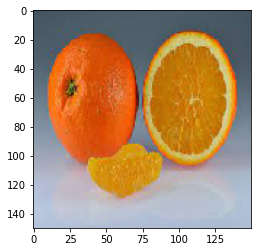

In [13]:
img=load_img('/content/tải xuống (2).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]


'tao'

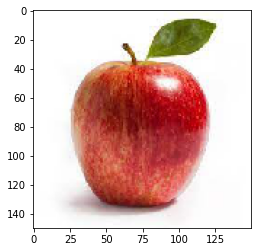

In [14]:
img=load_img('/content/tải xuống (1).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]

'kiwi'

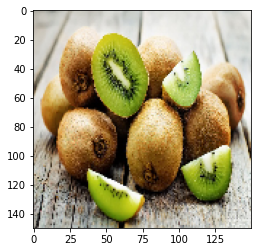

In [15]:
img=load_img('/content/6-cong-dung-cua-qua-kiwi-doi-voi-suc-khoe-va-mot-s-2.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model5.predict(img),axis=1)[0]
classes[np.argmax(model5.predict(img),axis=1)[0]]